In [ ]:
# 6 Task: Train and evaluate a Random Forest model on the dataset.

#New dataset: Employee Job Satisfaction
data = pd.read_csv("employee.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


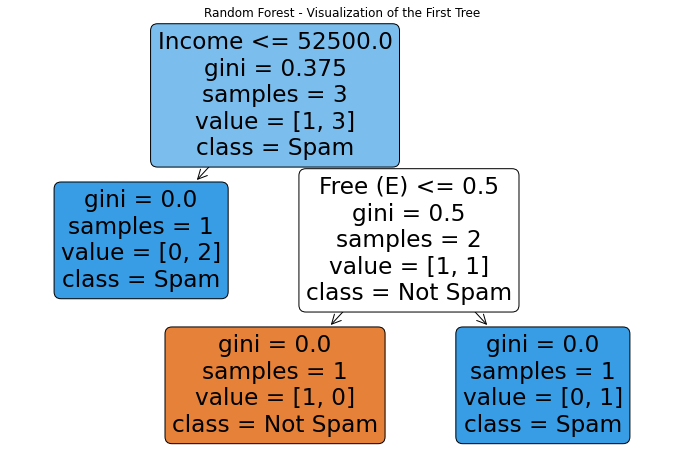

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample dataset
data = {
    'Email ID': [1, 2, 3, 4, 5],
    'Free (E)': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Win (F)': ['No', 'Yes', 'Yes', 'No', 'No'],
    'Age': [23, 45, 34, 50, 30],
    'Income': [50000, 60000, 70000, 55000, 48000],
    'Spam (H)': ['Spam', 'Not Spam', 'Spam', 'Not Spam', 'Spam']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data into numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Free (E)'] = label_encoder.fit_transform(df['Free (E)'])
df['Win (F)'] = label_encoder.fit_transform(df['Win (F)'])
df['Spam (H)'] = label_encoder.fit_transform(df['Spam (H)'])  # Target column

# Features (X) and target (y)
X = df[['Free (E)', 'Win (F)', 'Age', 'Income']]  # Features
y = df['Spam (H)']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualizing the first tree in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['Not Spam', 'Spam'], rounded=True)
plt.title("Random Forest - Visualization of the First Tree")
plt.show()
